<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Classification using Perceptrons

The following graph shows the distribution of samples (features $x_1$ and $x_2$) related to 3 (three) categories. In this exercise, solve the following questions:

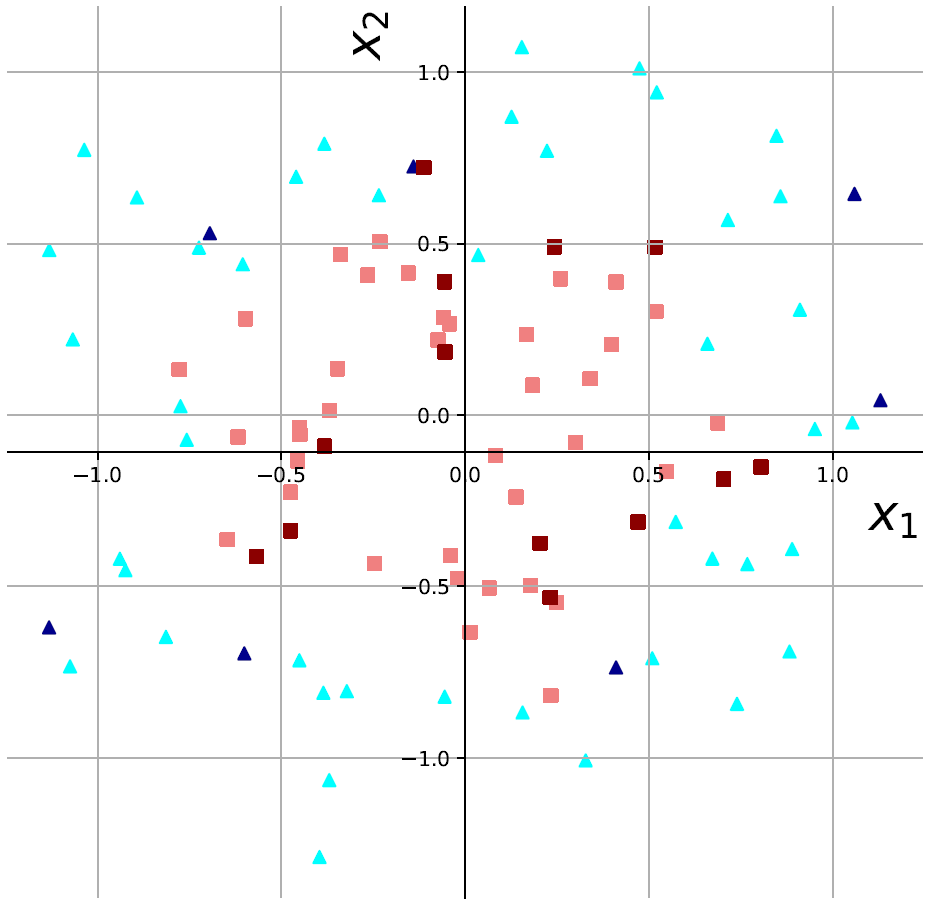

## Part 1

With the Perceptron you developed using only Numpy, provide a model capable of reasonably classifying such samples. Obs: For training procedure, use files (which are represented by light red, light green and cyan in the graph);

| Samples | Labels |
|---|---|
| X_train.npy | y_train.npy |

And for testing, use the following files (which are represented by dark blue, dark green and dark red in the graph):

| Samples | Labels |
|---|---|
| X_test.npy | y_test.npy |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x_train = np.load('dados/db1/x_train.npy')
y_train = np.load('dados/db1/y_train.npy')

x_test = np.load('dados/db1/x_test.npy')
y_test = np.load('dados/db1/y_test.npy')

In [10]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (124, 13)
y_train: (124,)
x_test: (54, 13)
y_test: (54,)


In [11]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Por padrão utilizar os nomes 'predictions' e 'y_test'

predictions = [1, 1, 1, 1, 1]
y_test = [1, 1, 2, 1, 1]

In [12]:
assert accuracy(predictions, y_test) > 0.55

In [13]:
class Perceptron:
  
    def __init__ (self, input_size, lr = 1, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = np.random.rand(input_size + 1)

    def activate(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, x_test):
        inputs_with_bias = np.append(x_test, 1)
        A = np.dot(inputs_with_bias, self.weights) # soma ponderada dos inputs e pesos
        y_pred = self.activate(A)
        return y_pred

    def fit(self, x_train, y_train, plot=False):
        acc = []
        for i in range(self.epochs):
            for inputs, label in zip(x_train, y_train):
                prediction = self.predict(inputs)
                error = label - prediction
                # Atualiza os pesos usando a regra de aprendizagem do perceptron
                self.weights += self.lr * error * np.append(inputs, 1)
            y_pred_train = [self.predict(x) for x in x_train]
            acc.append(accuracy(y_pred_train, y_train))

        if plot:
            plt.figure(figsize=(15, 7))
            
            plt.title('Accuracy x Epochs')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            
            plt.plot(acc)
            plt.xlim(0, self.epochs)
            plt.ylim(0, 1)
            plt.show()

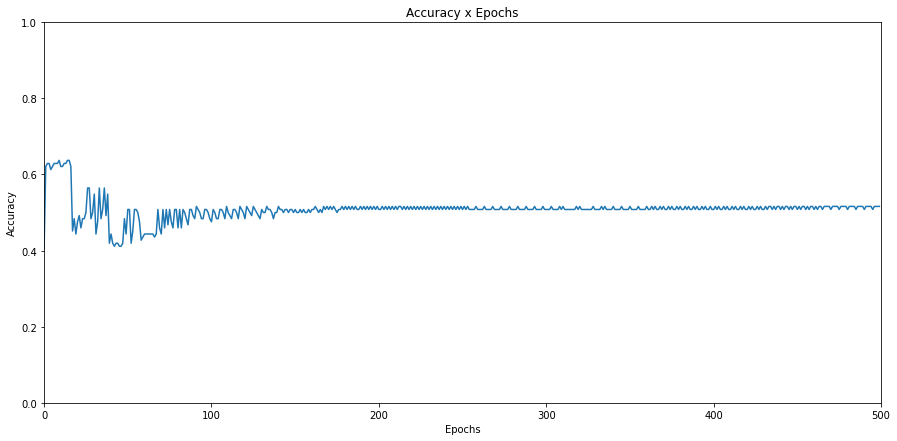

In [231]:
perceptron = Perceptron(input_size = x_train.shape[1], epochs=500, lr=0.5)
wt_matrix = perceptron.fit(x_train, y_train, plot=True)

In [232]:
y_pred = [perceptron.predict(x) for x in x_test]
print(f'Accuracy: {accuracy(y_pred, y_test)}')

Accuracy: 0.5555555555555556


## Part 2

**Perform some linear data transformation** that you believe might cause an improvement in the classification's training and testing performances.

In [ ]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Por padrão utilizar os nomes 'predictions' e 'y_test'

predictions = [1, 1, 1, 1, 1]
y_test = [1, 1, 2, 1, 1]

In [ ]:
assert accuracy(predictions, y_test) > 0.55

In [233]:
def linear_transformation(x,y,degree=5):

    n_samples = x.shape[0]
    n_samples_y = y.shape[0]

    polynomial_X = np.ones((n_samples, 1))  
    polynomial_Y = np.ones((n_samples_y, 1))  
    
    for d in range(1, degree + 1):
        polynomial_X = np.hstack((polynomial_X, x ** d))
        polynomial_Y = np.hstack((polynomial_Y, y ** d))
    
    return polynomial_X, polynomial_Y

In [234]:
x_train = np.load('dados/db1/x_train.npy')
y_train = np.load('dados/db1/y_train.npy')

x_test = np.load('dados/db1/x_test.npy')
y_test = np.load('dados/db1/y_test.npy')

In [235]:
X_transformed, X_transformed_test = linear_transformation(x_train, x_test, degree=2)
X_transformed.shape

(124, 27)

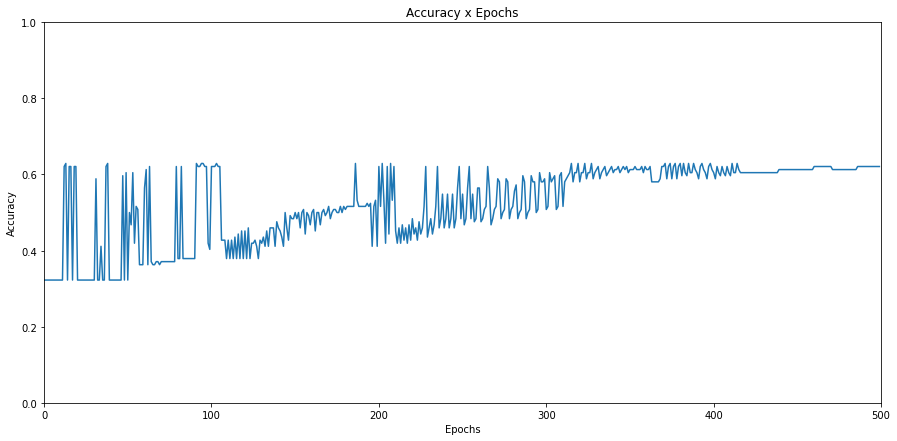

In [236]:
perceptron = Perceptron(input_size = X_transformed.shape[1], epochs=500, lr=0.5)
wt_matrix = perceptron.fit(X_transformed, y_train, plot=True)

In [237]:
predictions = [perceptron.predict(x) for x in X_transformed_test]
print(f'Accuracy: {accuracy(predictions, y_test)}')

Accuracy: 0.6851851851851852
